In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data=pd.read_csv("./data.csv")

In [3]:
print(raw_data.head())


   id  year  gender  country_birth  age  race  region  marital_status  \
0   1  1979       2              1   20     3       1               1   
1   1  1980       2              1   21     3      -5              -5   
2   1  1981       2              1   22     3       1               1   
3   1  1982       2              1   23     3      -5              -5   
4   1  1983       2              1   24     3      -5              -5   

   highest_grade  employment_status  main_job_num  tenure  total_jobs  \
0             12                  1             2      41         2.0   
1             -4                 -5            -4      -4         2.0   
2             12                  1             2     162         2.0   
3             -4                 -5            -4      -4         2.0   
4             -4                 -5            -4      -4         2.0   

   pay_rate  hourly_wage  occupation_main  industry  sample_id  
0     12500          328              325        -4      

In [4]:
raw_data.columns

Index(['id', 'year', 'gender', 'country_birth', 'age', 'race', 'region',
       'marital_status', 'highest_grade', 'employment_status', 'main_job_num',
       'tenure', 'total_jobs', 'pay_rate', 'hourly_wage', 'occupation_main',
       'industry', 'sample_id'],
      dtype='object')

In [5]:
## CLEAN THE DATA
df_data = raw_data[:]
df_data = df_data.fillna(0)
len(df_data)

329836

In [6]:
# Output: "hourly_wage"
# Delete all negative values

In [7]:
NULL = pd.to_numeric("")
df_data["hourly_wage"] = df_data["hourly_wage"].replace({-4 : NULL})

In [8]:
df_data = df_data.dropna(how="any")
len(df_data)

191220

In [9]:
df_data.head()

,id,year,gender,country_birth,age,race,region,marital_status,highest_grade,employment_status,main_job_num,tenure,total_jobs,pay_rate,hourly_wage,occupation_main,industry,sample_id
0,1,1979,2,1,20,3,1,1,12,1,2,41,2.0,12500,328.0,325,-4,5
2,1,1981,2,1,22,3,1,1,12,1,2,162,2.0,27500,361.0,-4,-4,5
26,2,1979,2,2,20,3,1,1,9,1,1,42,3.0,13500,385.0,305,-4,5
27,2,1980,2,2,21,3,1,1,9,1,1,95,3.0,16000,457.0,-4,-4,5
28,2,1981,2,2,22,3,1,1,9,1,1,146,3.0,18000,514.0,-4,-4,5


In [10]:
# Input-1: "gender"
# 1: male
# 2: female

In [11]:
df_data["male"] = df_data["gender"] % 2
df_data["female"] = df_data["gender"] - 1

In [12]:
# Input-2: "country_birth"
# 1: US
# 2: others

In [13]:
df_data["country_birth_US"] = (df_data["country_birth"] == 1)

In [14]:
# Input-3: "age"

In [15]:
# "age" ranges from 14~57
df_data["age_45+"]   = np.floor(df_data["age"]/45)
df_data["age_30-45"] = np.floor(df_data["age"]/30) - df_data["age_45+"]
df_data["age_30-"]   = 1 - (df_data["age_45+"] + df_data["age_30-45"])


In [16]:
# Input-4: "race"
# 1 HISPANIC
# 2 BLACK
# 3 NON-BLACK, NON-HISPANIC

In [17]:
df_data["race_hispanic"] = df_data["race"] % 3 % 2
df_data["race_black"]    = (df_data["race"] - 1) % 2
df_data["race_others"]   = np.floor(df_data["race"] / 3)

In [18]:
# Input-5: "region"
# 1 NORTHEAST
# 2 NORTH CENTRAL
# 3 SOUTH
# 4 WEST

In [19]:
df_data["region_northeast"]    = (df_data["region"] == 1)
df_data["region_northcentral"] = (df_data["region"] == 2)
df_data["region_south"]        = (df_data["region"] == 3)
df_data["region_west"]         = (df_data["region"] == 4)
df_data["region_unknown"]      = ((df_data["region"] != 1) & 
                                  (df_data["region"] != 2) & 
                                  (df_data["region"] != 3) & 
                                  (df_data["region"] != 4))

In [20]:
# Input-6: "marital_status"
# 1 NEVER MARRIED
# 2 MARRIED, SPOUSE PRESENT
# 3 OTHER

In [21]:
df_data["marital_never"]          = (df_data["marital_status"] == 1)
df_data["marital_spouse_present"] = (df_data["marital_status"] == 2)
df_data["marital_others"]         = ((df_data["marital_status"] != 1) & (df_data["marital_status"] != 2))

In [22]:
# Input-7: "highest_grade"
#  0 NONE
# 93 PRE-KINDERGARTEN
# 94 KINDERGARTEN
#  1 1ST GRADE
#  2 2ND GRADE
#  3 3RD GRADE
#  4 4TH GRADE
#  5 5TH GRADE
#  6 6TH GRADE
#  7 7TH GRADE
#  8 8TH GRADE
#  9 9TH GRADE
# 10 10TH GRADE
# 11 11TH GRADE
# 12 12TH GRADE
# 13 1ST YR COL
# 14 2ND YR COL
# 15 3RD YR COL
# 16 4TH YR COL
# 17 5TH YR COL
# 18 6TH YR COL
# 19 7TH YR COL
# 20 8TH YR COL OR MORE
# 95 UNGRADED

In [23]:
df_data["edu_highschool-"]    = (((df_data["highest_grade"] >= 0) & (df_data["highest_grade"] <= 8)) |
                                 (df_data["highest_grade"] > 90))
df_data["edu_highschool"]     = ((df_data["highest_grade"] >= 9) & (df_data["highest_grade"] <= 12))
df_data["edu_undergraduate"]  = ((df_data["highest_grade"] >= 13) & (df_data["highest_grade"] <= 16))
df_data["edu_undergraduate+"] = ((df_data["highest_grade"] >= 17) & (df_data["highest_grade"] <= 20))
df_data["edu_unknown"]        = (df_data["highest_grade"] < 0)

In [24]:
# Input-8: "employment_status"
# 1 EMPLOYED
# 2 UNEMPLOYED
# 3 OUT OF LABOR FORCE
# 4 IN ACTIVE FORCES

In [25]:
df_data["employment_employed"]       = (df_data["employment_status"] == 1)
df_data["employment_unemployed"]     = (df_data["employment_status"] == 2)
df_data["employment_out_laborforce"] = (df_data["employment_status"] == 3)
df_data["employment_active"]         = (df_data["employment_status"] == 4)
df_data["employment_unknown"]        = (df_data["employment_status"] <= 0)

In [26]:
# Input-9: "tenure"
# three months-:  0-12
# two years:     13-104
# five years:   105-260
# ten years:    261-520
# ten years+ :  521+
# others(unknown) : -4

In [27]:
df_data["tenure_3m"]      = ((df_data["tenure"] >= 0) & (df_data["tenure"] <= 12))
df_data["tenure_2y"]      = ((df_data["tenure"] >= 13) & (df_data["tenure"] <= 104))
df_data["tenure_5y"]      = ((df_data["tenure"] >= 105) & (df_data["tenure"] <= 260))
df_data["tenure_10y"]     = ((df_data["tenure"] >= 261) & (df_data["tenure"] <= 520))
df_data["tenure_10y+"]    = (df_data["tenure"] >= 521)
df_data["tenure_unknown"] = (df_data["tenure"] < 0)

In [28]:
# Input-10: "total_jobs"

In [29]:
df_data["jobs_2-"]      = ((df_data["total_jobs"] > 0) & (df_data["total_jobs"] <= 2))
df_data["jobs_5"]       = ((df_data["total_jobs"] > 2) & (df_data["total_jobs"] <= 5))
df_data["jobs_10"]      = ((df_data["total_jobs"] > 5) & (df_data["total_jobs"] <= 10))
df_data["jobs_10+"]     = (df_data["total_jobs"] > 10)
df_data["jobs_unknown"] = (df_data["total_jobs"] <= 0)

In [30]:
# Input-11: "occupation_main"
# technologist:         001-195, 1000-1960 (excl. 1800-1860)
# sales:                260-285, 4700-4960
# social science:       301-395, 1800-1860, 2000-2550
# manufacturing worker: 401-575, 601-715, 740-785, 6200-9750
# armed force:          580-590, 9840
# farmer:               801-802, 821-824, 6000-6130
# general services:     901-984, 3700-5930 (excl. 4700-4960), 7800-8960
# management:           201-245, 10-950 (excl. above)
# entertainment&sports: 2600-2960
# health care:          3000-3650


In [31]:
df_data["occupation_tech"] = (((df_data["occupation_main"]>=1)&(df_data["occupation_main"]<=195)) | 
                              ((df_data["occupation_main"]>=1000)&(df_data["occupation_main"]<1800)) | 
                              ((df_data["occupation_main"]>1860)&(df_data["occupation_main"]<=1960)))

df_data["occupation_sales"] = (((df_data["occupation_main"]>=260)&(df_data["occupation_main"]<=285)) | 
                               ((df_data["occupation_main"]>=4700)&(df_data["occupation_main"]<=4960)))

df_data["occupation_social_science"] = (((df_data["occupation_main"]>=301)&(df_data["occupation_main"]<=395)) | 
                                        ((df_data["occupation_main"]>=1800)&(df_data["occupation_main"]<=1860)) | 
                                        ((df_data["occupation_main"]>=2000)&(df_data["occupation_main"]<=2550)))

df_data["occupation_manufacture_worker"] = (((df_data["occupation_main"]>=401)&(df_data["occupation_main"]<=575)) | 
                                            ((df_data["occupation_main"]>=601)&(df_data["occupation_main"]<=715)) | 
                                            ((df_data["occupation_main"]>=740)&(df_data["occupation_main"]<=785)) | 
                                            ((df_data["occupation_main"]>=6200)&(df_data["occupation_main"]<=9750)))

df_data["occupation_military"] = (((df_data["occupation_main"]>=580)&(df_data["occupation_main"]<=590)) | 
                                  (df_data["occupation_main"]==9840))

df_data["occupation_farmer"] = (((df_data["occupation_main"]>=801)&(df_data["occupation_main"]<=802)) | 
                                ((df_data["occupation_main"]>=821)&(df_data["occupation_main"]<=824)) | 
                                ((df_data["occupation_main"]>=6000)&(df_data["occupation_main"]<=6130)))

df_data["occupation_service"] = (((df_data["occupation_main"]>=901)&(df_data["occupation_main"]<=984)) | 
                                 ((df_data["occupation_main"]>=3700)&(df_data["occupation_main"]<4700)) | 
                                 ((df_data["occupation_main"]>4960)&(df_data["occupation_main"]<=5930)) | 
                                 ((df_data["occupation_main"]>=7800)&(df_data["occupation_main"]<=8960)))

df_data["occupation_management"] = (((df_data["occupation_main"]>=196)&(df_data["occupation_main"]<=259)) | 
                                    ((df_data["occupation_main"]>=286)&(df_data["occupation_main"]<=300)) | 
                                    ((df_data["occupation_main"]>=396)&(df_data["occupation_main"]<=400)) | 
                                    ((df_data["occupation_main"]>=576)&(df_data["occupation_main"]<=579)) | 
                                    ((df_data["occupation_main"]>=591)&(df_data["occupation_main"]<=800)) | 
                                    ((df_data["occupation_main"]>=803)&(df_data["occupation_main"]<=820)) | 
                                    ((df_data["occupation_main"]>=825)&(df_data["occupation_main"]<=900)))

df_data["occupation_entertainment"] = ((df_data["occupation_main"]>=2600)&(df_data["occupation_main"]<=2960))

df_data["occupation_healthcare"] = ((df_data["occupation_main"]>=3000)&(df_data["occupation_main"]<=3650))

df_data["occupation_unknown"] = ((df_data["occupation_main"]<=0) | (df_data["occupation_main"]==9990))


In [32]:
# input-12: "industry"
# agriculture:               017-028, 170-290
# mining:                    047-057, 370-490
# manufacture:               067-077, 107-398, 770, 1070-3990
# public service:            407-479, 570-690, 907-937, 7570-7790
# trade:                     507-698, 4070-4590, 4670-5790, 6070-6390
# finance:                   707-718, 6870-6990, 7070-7190
# tech service:              727-759, 828-897, 6470-6780, 7270-7490
# entertainment service:     807-809, 8560-8590
# education:                 7860-7890
# health care:               7970-8470
# other service:             769-798, 8660-8690, 8770-9290
# administration & military: 9370-9870, 9890


In [33]:
df_data["industry_agriculture"] = (((df_data["industry"]>=17)&(df_data["industry"]<=28)) | 
                                   ((df_data["industry"]>=170)&(df_data["industry"]<=290))) 

df_data["industry_mining"] = (((df_data["industry"]>=47)&(df_data["industry"]<=57)) | 
                              ((df_data["industry"]>=370)&(df_data["industry"]<=490))) 

df_data["industry_manufacture"] = (((df_data["industry"]>=67)&(df_data["industry"]<=77)) | 
                                   ((df_data["industry"]>=107)&(df_data["industry"]<=398)) |
                                   (df_data["industry"]==770) |
                                   ((df_data["industry"]>=1070)&(df_data["industry"]<=3990)))

df_data["industry_public_service"] = (((df_data["industry"]>=407)&(df_data["industry"]<=479)) | 
                                      ((df_data["industry"]>=570)&(df_data["industry"]<=690)) |
                                      ((df_data["industry"]>=907)&(df_data["industry"]<=937)) |
                                      ((df_data["industry"]>=7570)&(df_data["industry"]<=7790)))

df_data["industry_trade"] = (((df_data["industry"]>=507)&(df_data["industry"]<=698)) | 
                             ((df_data["industry"]>=4070)&(df_data["industry"]<=4590)) |
                             ((df_data["industry"]>=4670)&(df_data["industry"]<=5790)) |
                             ((df_data["industry"]>=6070)&(df_data["industry"]<=6390)))

df_data["industry_finance"] = (((df_data["industry"]>=707)&(df_data["industry"]<=718)) | 
                             ((df_data["industry"]>=6870)&(df_data["industry"]<=6990)) |
                             ((df_data["industry"]>=7070)&(df_data["industry"]<=7190)))

df_data["industry_tech_service"] = (((df_data["industry"]>=727)&(df_data["industry"]<=759)) | 
                                    ((df_data["industry"]>=828)&(df_data["industry"]<=897)) |
                                    ((df_data["industry"]>=6470)&(df_data["industry"]<=6780)) |
                                    ((df_data["industry"]>=7270)&(df_data["industry"]<=7490)))

df_data["industry_entertainment"] = (((df_data["industry"]>=807)&(df_data["industry"]<=809)) | 
                                     ((df_data["industry"]>=8560)&(df_data["industry"]<=8590)))

df_data["industry_education"] = ((df_data["industry"]>=7860)&(df_data["industry"]<=7890))

df_data["industry_healthcare"] = ((df_data["industry"]>=7970)&(df_data["industry"]<=8470))

df_data["industry_other_service"] = (((df_data["industry"]>=769)&(df_data["industry"]<=798)) | 
                                     ((df_data["industry"]>=8660)&(df_data["industry"]<=8690)) |
                                     ((df_data["industry"]>=8770)&(df_data["industry"]<=9290)))

df_data["industry_admin_military"] = (((df_data["industry"]>=9370)&(df_data["industry"]<=9870)) | 
                                      (df_data["industry"]==9890))

df_data["industry_unknown"] = ((df_data["industry"]<=0) | (df_data["industry"]==9990))


In [34]:
# Delete useless columns
del df_data["gender"]
del df_data["country_birth"]
del df_data["race"]
del df_data["region"]
del df_data["marital_status"]
del df_data["highest_grade"]
del df_data["employment_status"]
del df_data["main_job_num"]
del df_data["total_jobs"]
del df_data["pay_rate"]
del df_data["occupation_main"]
del df_data["industry"]
del df_data["sample_id"]


In [35]:
## CLEANED DATA
df_data.to_csv("./data_cleaned.csv")

In [36]:
len(df_data)

191220

In [37]:
df_data.head()

,id,year,age,tenure,hourly_wage,male,female,country_birth_US,age_45+,age_30-45,...,industry_public_service,industry_trade,industry_finance,industry_tech_service,industry_entertainment,industry_education,industry_healthcare,industry_other_service,industry_admin_military,industry_unknown
0,1,1979,20,41,328.0,0,1,True,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,1,1981,22,162,361.0,0,1,True,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
26,2,1979,20,42,385.0,0,1,False,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
27,2,1980,21,95,457.0,0,1,False,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
28,2,1981,22,146,514.0,0,1,False,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [38]:
# Delete useless columns - cont.
del df_data["id"]
del df_data["year"]
del df_data["age"]
del df_data["tenure"]


In [39]:
### Check the Outlier data of "hourly_wage"

In [40]:
ss_wage = df_data["hourly_wage"]
wage_stat = ss_wage.describe()
wage_stat

count    1.912200e+05
mean     1.424549e+03
std      2.675170e+04
min      0.000000e+00
25%      4.750000e+02
50%      8.000000e+02
75%      1.350000e+03
max      6.000000e+06
Name: hourly_wage, dtype: float64

In [41]:
wage_q1     = wage_stat["25%"]
wage_q3     = wage_stat["75%"]
wage_median = wage_stat["50%"]
wage_iqr    = wage_q3 - wage_q1
wage_upper  = wage_q3 + wage_iqr*10
wage_lower  = 0
wage_upper

10100.0

In [42]:
df_data2 = df_data[:]

In [43]:
df_data2["wage_outlier"] = ((df_data2["hourly_wage"]<wage_lower) | (df_data2["hourly_wage"]>wage_upper))

/Users/Harper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_data2["wage_outlier"] = df_data2["wage_outlier"].replace({True : NULL})

/Users/Harper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_data2 = df_data2.dropna(how="any")
outlier_rate = (len(df_data) - len(df_data2)) / len(df_data)
outlier_rate

0.003723459889132936

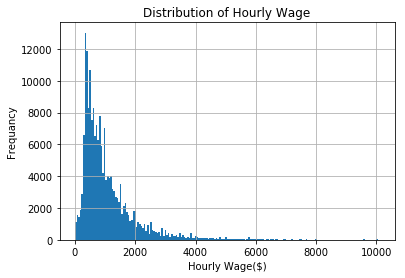

In [46]:
ss_wage_cleaned = df_data2["hourly_wage"]
plt.hist(ss_wage_cleaned, int(len(ss_wage_cleaned)/1000))
plt.title("Distribution of Hourly Wage")
plt.xlabel("Hourly Wage($)")
plt.ylabel("Frequancy")
plt.grid()
plt.savefig("HourlyWage_distribution.png")
plt.show()

In [47]:
### Encoding the Output data: "hourly_wage"

In [48]:
df_data2["wage_q1_475"]      = ((df_data2["hourly_wage"]>=wage_lower) & (df_data2["hourly_wage"]<=wage_q1))
df_data2["wage_q2_800"]      = ((df_data2["hourly_wage"]>wage_q1) & (df_data2["hourly_wage"]<=wage_median))
df_data2["wage_q3_1350"]     = ((df_data2["hourly_wage"]>wage_median) & (df_data2["hourly_wage"]<=wage_q3))
df_data2["wage_q3+iqr_2662"] = ((df_data2["hourly_wage"]>wage_q3) & (df_data2["hourly_wage"]<=2662))
df_data2["wage_8000"]        = ((df_data2["hourly_wage"]>2662) & (df_data2["hourly_wage"]<=8000))
df_data2["wage_8000+"]       = (df_data2["hourly_wage"]>8000)


In [49]:
del df_data2["hourly_wage"]
del df_data2["wage_outlier"]

In [50]:
df_data2.head()

,male,female,country_birth_US,age_45+,age_30-45,age_30-,race_hispanic,race_black,race_others,region_northeast,...,industry_healthcare,industry_other_service,industry_admin_military,industry_unknown,wage_q1_475,wage_q2_800,wage_q3_1350,wage_q3+iqr_2662,wage_8000,wage_8000+
0,0,1,True,0.0,0.0,1.0,0,0,1.0,True,...,False,False,False,True,True,False,False,False,False,False
2,0,1,True,0.0,0.0,1.0,0,0,1.0,True,...,False,False,False,True,True,False,False,False,False,False
26,0,1,False,0.0,0.0,1.0,0,0,1.0,True,...,False,False,False,True,True,False,False,False,False,False
27,0,1,False,0.0,0.0,1.0,0,0,1.0,True,...,False,False,False,True,True,False,False,False,False,False
28,0,1,False,0.0,0.0,1.0,0,0,1.0,True,...,False,False,False,True,False,True,False,False,False,False


In [52]:
## Input_Ready DATA
df_data2.to_csv("./data_input.csv", index=False)